# Performance

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data

In [64]:
import pandas as pd
df = pd.read_csv('../../generated/database/csv/activity.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=False)
df

,user,achievement,points,game_mode,timestamp,group
0,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
1,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
2,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
3,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
4,d5082901-d846-4794-82af-2c7db8d50788,RefactorCodeAchievement,1,Leaderboard,2025-04-17 09:04:09.754310+02:00,B
...,...,...,...,...,...,...
1327,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:58:59.236919+02:00,A
1328,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:58:59.259630+02:00,A
1329,b39dc415-9bb6-4d5d-a8f9-30fd61f6a594,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:58:59.900757+02:00,A
1330,b39dc415-9bb6-4d5d-a8f9-30fd61f6a594,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:58:59.918734+02:00,A


## Achievements overview

In [65]:
counts = df["achievement"].value_counts()
counts

achievement
RunXTestSuitesAchievement            475
RefactorAddXAssertionsAchievement    279
AddTestsAchievement                  241
RefactorCodeAchievement               99
RunWithCoverageAchievement            57
CoverXLinesAchievement                47
CoverXMethodsAchievement              47
CoverXClassesAchievement              47
RefactorXTestNamesAchievement         34
CoverXBranchesAchievement              6
Name: count, dtype: int64

## Runs type

In [66]:
df_run = df[(df["achievement"] == "RunXTestSuitesAchievement") | (df["achievement"] == "RunWithCoverageAchievement")]
run_data = df_run.groupby(['group', 'game_mode', 'achievement']).size().reset_index(name='count')
run_data


,group,game_mode,achievement,count
0,A,Achievements,RunWithCoverageAchievement,5
1,A,Achievements,RunXTestSuitesAchievement,111
2,A,Leaderboard,RunWithCoverageAchievement,14
3,A,Leaderboard,RunXTestSuitesAchievement,124
4,B,Achievements,RunWithCoverageAchievement,33
5,B,Achievements,RunXTestSuitesAchievement,179
6,B,Leaderboard,RunWithCoverageAchievement,5
7,B,Leaderboard,RunXTestSuitesAchievement,61


# Nombre de tests par minute

In [67]:
run_data[run_data["group"] == "B"]

,group,game_mode,achievement,count
4,B,Achievements,RunWithCoverageAchievement,33
5,B,Achievements,RunXTestSuitesAchievement,179
6,B,Leaderboard,RunWithCoverageAchievement,5
7,B,Leaderboard,RunXTestSuitesAchievement,61


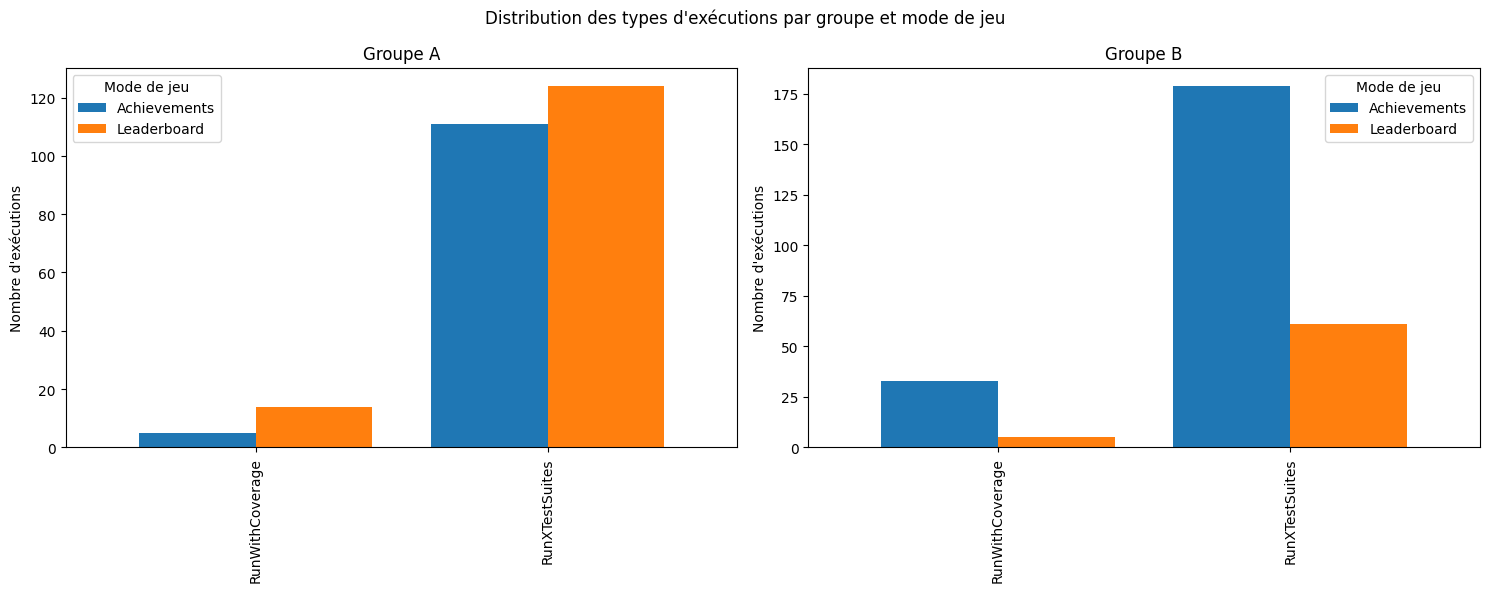

In [68]:
# Créer une figure plus compacte et lisible
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Groupe A 
group_a_achievements = run_data[(run_data['group'] == 'A') & (run_data['game_mode'] == 'Achievements')]
group_a_leaderboard = run_data[(run_data['group'] == 'A') & (run_data['game_mode'] == 'Leaderboard')]

group_a_data = pd.DataFrame({
    'Achievements': [
        group_a_achievements[group_a_achievements['achievement'] == 'RunWithCoverageAchievement']['count'].values[0],
        group_a_achievements[group_a_achievements['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0]
    ],
    'Leaderboard': [
        group_a_leaderboard[group_a_leaderboard['achievement'] == 'RunWithCoverageAchievement']['count'].values[0],
        group_a_leaderboard[group_a_leaderboard['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0]
    ]
}, index=['RunWithCoverage', 'RunXTestSuites'])

group_a_data.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title("Groupe A")
ax1.set_ylabel("Nombre d'exécutions")
ax1.legend(title="Mode de jeu")

# Groupe B
group_b_achievements = run_data[(run_data['group'] == 'B') & (run_data['game_mode'] == 'Achievements')]
group_b_leaderboard = run_data[(run_data['group'] == 'B') & (run_data['game_mode'] == 'Leaderboard')]

group_b_rwc_achievement = \
group_b_achievements[group_b_achievements['achievement'] == 'RunWithCoverageAchievement']['count'].values[0] if not \
group_b_achievements[group_b_achievements['achievement'] == 'RunWithCoverageAchievement'].empty else 0
group_b_rxts_achievement = \
group_b_achievements[group_b_achievements['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0] if not \
group_b_achievements[group_b_achievements['achievement'] == 'RunXTestSuitesAchievement'].empty else 0
group_b_rwc_leaderboard = \
group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunWithCoverageAchievement']['count'].values[0] if not \
group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunWithCoverageAchievement'].empty else 0
group_b_rxts_leaderboard = \
group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunXTestSuitesAchievement']['count'].values[0] if not \
group_b_leaderboard[group_b_leaderboard['achievement'] == 'RunXTestSuitesAchievement'].empty else 0

group_b_data = pd.DataFrame({
    'Achievements': [group_b_rwc_achievement, group_b_rxts_achievement],
    'Leaderboard': [group_b_rwc_leaderboard, group_b_rxts_leaderboard]
}, index=['RunWithCoverage', 'RunXTestSuites'])

group_b_data.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title("Groupe B")
ax2.set_ylabel("Nombre d'exécutions")
ax2.legend(title="Mode de jeu")

plt.suptitle("Distribution des types d'exécutions par groupe et mode de jeu")
plt.tight_layout()
plt.show()


# Nombre de tests cumulé par minute

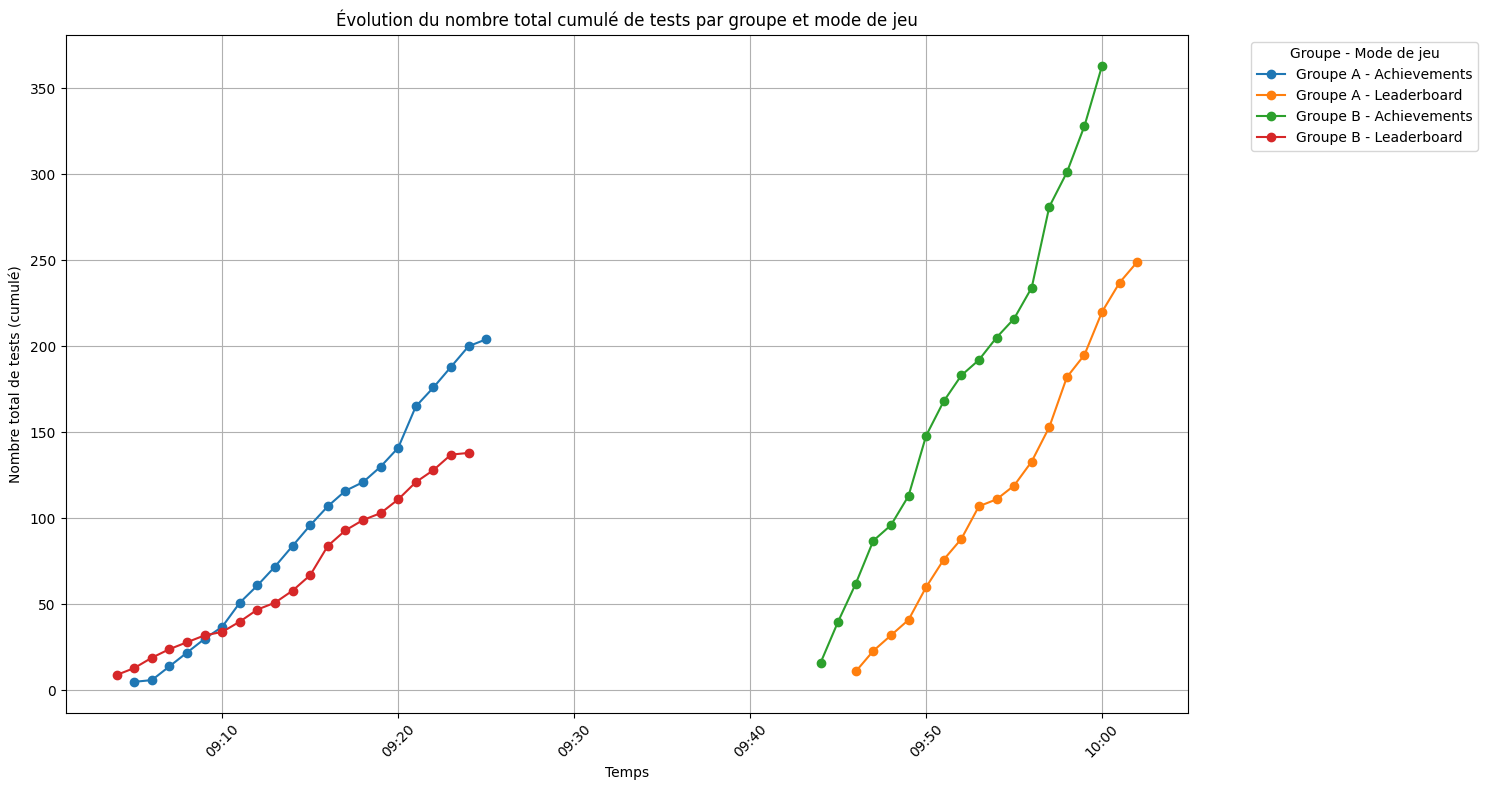

In [69]:
import pytz

df_all_tests = df[df['achievement'].str.contains('Test|Cover')].copy()
df_all_tests['minute'] = df_all_tests['timestamp'].dt.floor('min')

total_tests_per_minute = df_all_tests.groupby(['minute', 'group', 'game_mode']).size().reset_index(name='count')
total_tests_per_minute = total_tests_per_minute.sort_values('minute')

fig, ax = plt.subplots(figsize=(15, 8))

for group in ['A', 'B']:
    for mode in ['Achievements', 'Leaderboard']:
        data = total_tests_per_minute[
            (total_tests_per_minute['group'] == group) & (total_tests_per_minute['game_mode'] == mode)]

        # Calculate cumulative sum
        data = data.sort_values('minute')
        data['cumulative_count'] = data['count'].cumsum()

        plt.plot(data['minute'], data['cumulative_count'], label=f'Groupe {group} - {mode}', marker='o')

plt.title('Évolution du nombre total cumulé de tests par groupe et mode de jeu')
plt.xlabel('Temps')
plt.ylabel('Nombre total de tests (cumulé)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=pytz.timezone('Europe/Brussels')))
plt.xticks(rotation=45)
plt.legend(title='Groupe - Mode de jeu', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
